INSTALL PACKAGES

In [1]:
#pip install pandas
#pip install scipy
#pip install seaborn
#pip install matplotlib

IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

READING DATA 

In [3]:
transaction = pd.read_csv("Retail_Data_Transactions.csv")
response=pd.read_csv("Retail_Data_Response.csv")

merging two data files into a single file as df using left join

In [4]:
df=transaction.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [5]:
#features
df.dtypes
df.shape
df.head()
df.tail()


,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [6]:
#statistical features
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [7]:
# missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [8]:
df.shape

(125000, 4)

In [9]:
#31 missing values is approx 0.24 % so we can drop the null columns
df=df.dropna()
df.shape

(124969, 4)

In [10]:
#change datatypes

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

C:\Users\saide\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saide\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [12]:
# check for outliers use scipy.stats for tran_amount

z_score = np.abs(stats.zscore(df['tran_amount']))

threshold=3

outlier=z_score>threshold

print(df[outlier])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [13]:
# check for outliers use scipy.stats for response

z_score = np.abs(stats.zscore(df['response']))

threshold=3

outlier=z_score>threshold

print(df[outlier])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


<AxesSubplot:xlabel='tran_amount'>

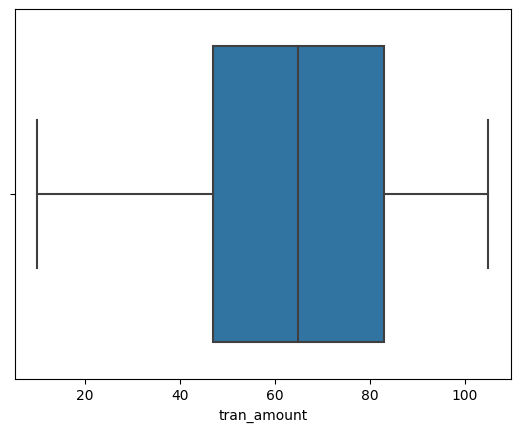

In [14]:
#visualize

sns.boxplot(x=df['tran_amount'])

In [15]:
# creating a new column from date into month category

df['month']=df['trans_date'].dt.month
df

C:\Users\saide\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [16]:
# Which 3 months have had the highest transaction amounts?

monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [17]:
# Customers having highest num of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

# sort

top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<AxesSubplot:xlabel='customer_id', ylabel='count'>

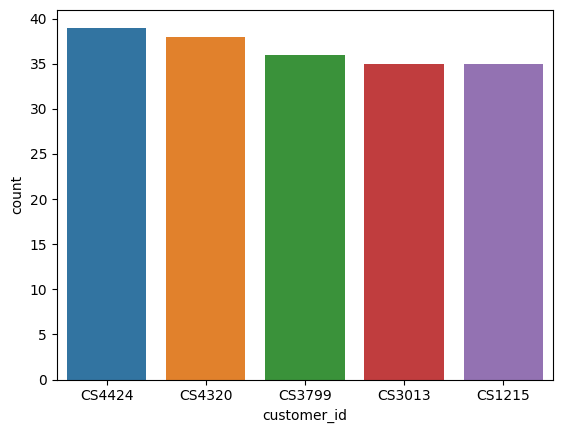

In [18]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [19]:
# Customers having highest value of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

# sort

top_5_sal= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<AxesSubplot:xlabel='customer_id', ylabel='tran_amount'>

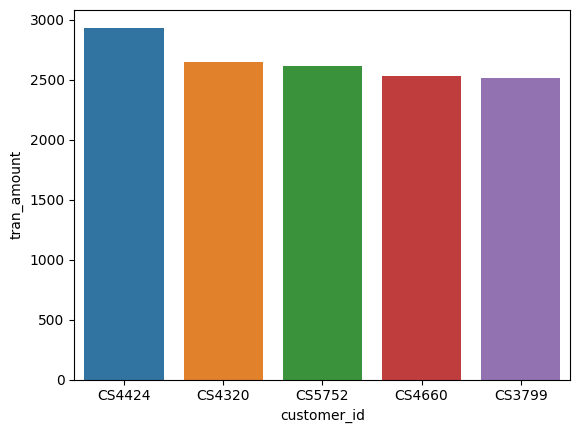

In [20]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

## Advanced Analytics

# Time series analysis

C:\Users\saide\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


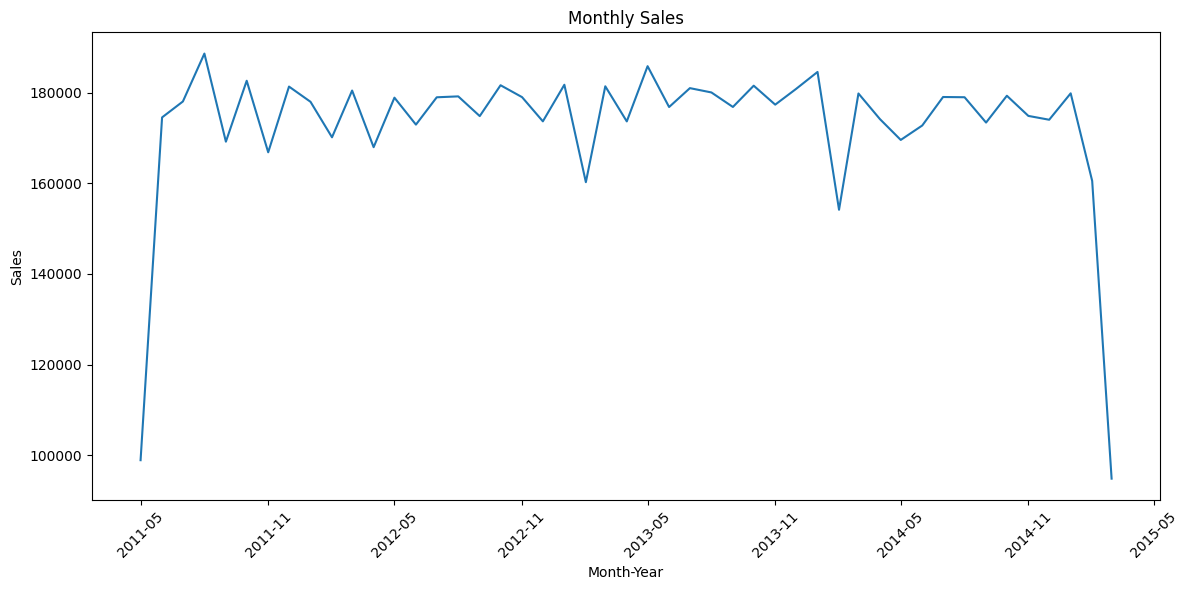

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()

### Cohort Segmentation

In [24]:
# Recency will be the maximum of trans_date
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency will be the count of transactions
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [25]:
set(rfm['Segment'])

{'P0', 'P2'}

### Churn Analysis

<AxesSubplot:>

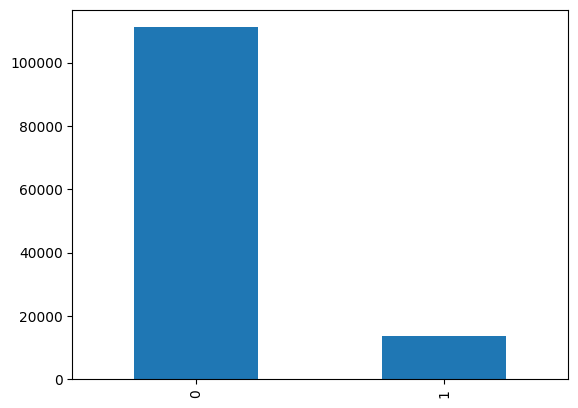

In [26]:
# Count the number of churned and active customers
churn_counts = df['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')


### Analyzing top customers

<AxesSubplot:xlabel='month_year'>

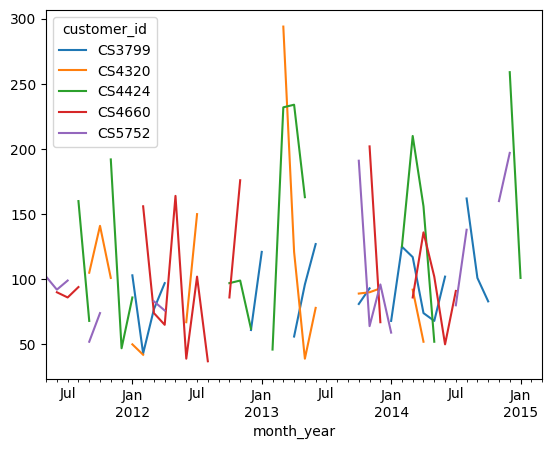

In [27]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')
